Basato su EVALITA 2020 HaSpeeDe (http://www.di.unito.it/~tutreeb/haspeede-evalita20/index.html)

Sviluppare un classificatore basato su SVM lineari che prende in input una rappresentazione
del testo basata solo su informazioni linguistiche non lessicali estratte utilizzando il sistema
Profiling-UD. Riportare i seguenti risultati:
- Valutazione del sistema con un processo di 5-fold cross validation condotto sul training
set;
- Valutazione del sistema sul test set ufficiale del task;
- Elenco delle 15 feature più importanti per la classificazione.

Come prima cosa, creo l'input da passare a Profiling-UD a partire dal file di training haspeede2_dev_taskAB.tsv.

In [1]:
#importo i pacchetti che mi serviranno
import os #per muoversi nelle cartelle
import csv #per gestire csv e tsv. csv separa valori con virgola, tsv separa valori con tab
import numpy as np #per array multidimensionali
import pandas as pd #per dataframe

In [2]:
#creo i path per il file di training e per la cartella che andrò a creare (per poi passarla a Profiling-UD)
train_path = 'haspeede2_dev/haspeede2_dev_taskAB.tsv'
out_dir = 'profiling_input'

In [3]:
#estraggo dal train_path il dataframe e lo salvo come df di pandas, usando tab come separatore in quanto è un .tsv
df_train = pd.read_csv(train_path, sep='\t')
#stampo df_train per vedere se l'estrazione è avvenuta correttamente
df_train

,id,text,hs,stereotype
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
1,2045,@user @user infatti finché ci hanno guadagnato...,0,0
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
3,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0
...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0
6833,9121,Il ministro dell'interno della Germania #Horst...,0,0
6834,8549,#Salvini: In Italia troppi si sono montati la ...,0,0
6835,9240,@user @user Chi giubila in buona fede non ha c...,0,0


In [4]:
#ho notato che una colonna del df si chiama "text " invece di "text"; la rinomino per evitare di confondermi e per riusabilità
df_train = df_train.rename(columns={'text ': 'text'})
#stampo df_train per vedere se la sostituzione è avvenuta correttamente

In [5]:
#creo una funzione per generare un namefile (per il file .txt che andrò a creare dopo) dato un df e una sua riga, costruito nel seguente formato: valore "id" + # + valore "hs" + ".txt"
def get_filename(df, row):
    idn = str(df.loc[row, 'id']) #ottengo il valore id in una riga specifica row
    hs = str(df.loc[row, 'hs']) #ottengo il valore hs in una riga specifica row (0 = non contiene hs, 1 = contiene hs)
    return f'{idn}#{hs}.txt' #ritorno il filename completo nel formato id#hs.txt

In [6]:
#creo una funzione per ottenere il testo del messaggio dato un df e una sua riga
def get_text(df, row):
    return str(df.loc[row, 'text']) #ritorno il testo del messaggio nella riga specifica

In [7]:
#ciclo per tutte le righe di df_train, creando per ognuna un file .txt con nome e contenuto costruiti dalle due funzioni precedenti
for i in range(df_train.shape[0]): #.shape restituisce una tupla con il numero di righe e colonne del df; utilizzo .shape[0] per ciclare sulle righe
    out_file_name = get_filename(df_train, i) #creo una variabile out_file_name che contiene il nome del file grazie alla funzione get_filename
    out_file_path = os.path.join(out_dir, out_file_name) #creo una variabile out_file_path che contiene il path finale, unendo la mia directory di output e il nome del file contenuto nella variabile out_file_name
    with open(out_file_path, 'w') as file: #creo il nuovo file .txt
        file.write(get_text(df_train, i)) #scrivo sul nuovo file .txt ciò che ottengo dalla funzione get_text

In [8]:
#ho creato i file e li ho passati a Profiling-Ud
#ho ottenuto un df con 6837 righe composte da Filename del tipo id#hs.conllu e un set di features estratte dal tool
#specifico il path del file .csv ottenuto come output da Profiling-Ud
profiling_output_path = 'profiling_output/11925.csv'

In [9]:
#creo una funzione per caricare un dataset e ritornarne le features (rilevate da Profiling-UD), i loro nomi e il filename, per ogni riga
def load_dataset(src_path):
    features_names = None
    documents_info = []
    features = []
    with open(src_path, 'r') as src_file: #apro il dataset in modalità solo lettura
        csv_reader = csv.reader(src_file, delimiter='\t') #creo un oggetto lettore .csv per poter poi iterare su tutte le sue righe
        for row in csv_reader: #itero per ogni riga del .csv
            if features_names is None: # la prima riga del csv contiene Filename e tutti i nomi delle features
                features_names = row[1:] #escludo Filename e prendo tutti gli altri nomi delle colonne, ovvero le features rilevate da Profiling-UD
            else:
                documents_info.append(row[0]) # il primo elemento di ogni riga contiene il nome del file, composto dal nome e da uno 0 se non è hs o 1 se lo è
                features.append(row[1:]) # dal secondo elemento in poi ci sono le features
    return features_names, documents_info, features

In [10]:
#inserisco in variabili features_names, documents_info e features e le stampo per controllare che tutto sia avvenuto correttamente
features_names, documents_info, features = load_dataset(profiling_output_path)

In [11]:
documents_info

['887#0.conllu',
 '2819#0.conllu',
 '6713#1.conllu',
 '2607#0.conllu',
 '1799#0.conllu',
 '7461#1.conllu',
 '9062#1.conllu',
 '1658#0.conllu',
 '27#0.conllu',
 '2510#0.conllu',
 '8984#0.conllu',
 '1772#0.conllu',
 '8107#1.conllu',
 '878#0.conllu',
 '7051#0.conllu',
 '2474#0.conllu',
 '4037#1.conllu',
 '2044#1.conllu',
 '194#0.conllu',
 '1129#0.conllu',
 '7312#1.conllu',
 '7119#1.conllu',
 '3560#1.conllu',
 '1106#0.conllu',
 '6653#1.conllu',
 '9673#1.conllu',
 '6752#1.conllu',
 '2724#0.conllu',
 '7896#0.conllu',
 '9002#1.conllu',
 '2820#0.conllu',
 '8781#1.conllu',
 '1477#0.conllu',
 '8268#1.conllu',
 '9118#1.conllu',
 '1664#1.conllu',
 '29#0.conllu',
 '745#0.conllu',
 '8435#0.conllu',
 '1673#0.conllu',
 '1797#0.conllu',
 '1943#0.conllu',
 '7439#1.conllu',
 '8062#0.conllu',
 '145#0.conllu',
 '8737#1.conllu',
 '7313#1.conllu',
 '7263#1.conllu',
 '9414#0.conllu',
 '8922#1.conllu',
 '247#0.conllu',
 '9136#0.conllu',
 '6684#1.conllu',
 '904#0.conllu',
 '8789#1.conllu',
 '1543#1.conllu',
 '1

In [12]:
features_names

['n_sentences',
 'n_tokens',
 'tokens_per_sent',
 'char_per_tok',
 'ttr_lemma_chunks_100',
 'ttr_form_chunks_100',
 'upos_dist_ADJ',
 'upos_dist_ADP',
 'upos_dist_ADV',
 'upos_dist_AUX',
 'upos_dist_CCONJ',
 'upos_dist_DET',
 'upos_dist_INTJ',
 'upos_dist_NOUN',
 'upos_dist_NUM',
 'upos_dist_PRON',
 'upos_dist_PROPN',
 'upos_dist_PUNCT',
 'upos_dist_SCONJ',
 'upos_dist_SYM',
 'upos_dist_VERB',
 'upos_dist_X',
 'lexical_density',
 'verbs_tense_dist_Fut',
 'verbs_tense_dist_Imp',
 'verbs_tense_dist_Past',
 'verbs_tense_dist_Pres',
 'verbs_mood_dist_Cnd',
 'verbs_mood_dist_Imp',
 'verbs_mood_dist_Ind',
 'verbs_mood_dist_Sub',
 'verbs_form_dist_Fin',
 'verbs_form_dist_Ger',
 'verbs_form_dist_Inf',
 'verbs_form_dist_Part',
 'verbs_num_pers_dist_Plur+1',
 'verbs_num_pers_dist_Plur+2',
 'verbs_num_pers_dist_Plur+3',
 'verbs_num_pers_dist_Sing+1',
 'verbs_num_pers_dist_Sing+2',
 'verbs_num_pers_dist_Sing+3',
 'aux_tense_dist_Fut',
 'aux_tense_dist_Imp',
 'aux_tense_dist_Past',
 'aux_tense_dist

In [13]:
features

[['3',
  '28',
  '9.333333333333334',
  '4.75',
  '0',
  '0',
  '7.142857142857143',
  '10.714285714285714',
  '0',
  '3.5714285714285716',
  '0',
  '21.428571428571427',
  '0',
  '21.428571428571427',
  '0',
  '0',
  '14.285714285714286',
  '14.285714285714286',
  '0',
  '0',
  '7.142857142857143',
  '0',
  '0.5833333333333334',
  '0',
  '0',
  '0',
  '100.0',
  '0',
  '0',
  '100.0',
  '0',
  '50.0',
  '0',
  '50.0',
  '0',
  '100.0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '100.0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '100.0',
  '0',
  '100.0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '100.0',
  '0.6666666666666666',
  '66.66666666666667',
  '2.5',
  '0',
  '50.0',
  '0',
  '0',
  '50.0',
  '0',
  '0',
  '2.3333333333333335',
  '14.0',
  '4.333333333333333',
  '2.0952380952380953',
  '8',
  '1.0',
  '2',
  '100.0',
  '0',
  '0',
  '0',
  '0',
  '0.0',
  '100.0',
  '100.0',
  '0.0',
  '0',
  '0',
  '0',
  '0',
  '3.5714285714285716',
  '0',
  '3.5714285714285716',
  '0'

In [14]:
#creo una lista contenente le label di ogni documento
def create_label_list(documents_info):
    labels = []
    for doc_info in documents_info: #scorro la lista dei nomi dei documenti
        doc_info = doc_info[0:-len('.conllu')] #escludo gli ultimi len('conllu') caratteri, ovvero gli ultimi 7
        splitted_doc_info = doc_info.split('#') #trasformo la stringa in una lista composta da due stringhe, una prima del # (l'id del file) e una dopo (il valore binario che indica se è hs o meno)
        hs = splitted_doc_info[1] #prendo la seconda stringa dela lista, quella binaria che indica se il valore è hs o meno
        labels.append(hs) #aggiungo il valore binario ottenuto e immagazzinato sopra in hs alla lista labels
    return labels

In [15]:
#creo la lista di labels dei miei documenti e la stampo per vedere se tutto ha funzionato correttamente
labels = create_label_list(documents_info)
labels

['0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0'

In [16]:
#effettuo la divisione in train e test set
from sklearn.model_selection import train_test_split

#utilizzo train_test_split, divido in 80% training e 20% test
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.2, random_state = 42 #tengo random_state a 42 per poter rifare una suddivisione con lo stesso seed
)

#stampo, per controllare, il numero di campioni nel training e nel test set
print("Numero di campioni nel training set:", len(train_features))
print("Numero di campioni nel test set:", len(test_features))

Numero di campioni nel training set: 5469
Numero di campioni nel test set: 1368


In [17]:
#normalizzo adesso tutti i valori delle features tra 0 e 1, utilizzando il MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_features)
#controllo che tutto abbia funzionato correttamente stampando X_train
X_train

array([[0.10526316, 0.15942029, 0.08695652, ..., 0.        , 0.        ,
        0.        ],
       [0.05263158, 0.14492754, 0.13043478, ..., 0.        , 0.        ,
        0.        ],
       [0.05263158, 0.10144928, 0.08695652, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26315789, 0.36231884, 0.09661836, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12318841, 0.24637681, ..., 0.        , 0.        ,
        0.        ],
       [0.05263158, 0.07971014, 0.06521739, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
#addestro l'svm su X_train
from sklearn.svm import LinearSVC
svc = LinearSVC(dual=False)
svc.fit(X_train, train_labels)

LinearSVC(dual=False)

In [19]:
#scalo le caratteristiche del test set sullo scaler addestrato sul training set
X_test = scaler.transform(test_features)

In [20]:
#importo le librerie per verificare le valutazioni
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       789
           1       0.63      0.50      0.56       579

    accuracy                           0.66      1368
   macro avg       0.66      0.64      0.64      1368
weighted avg       0.66      0.66      0.66      1368



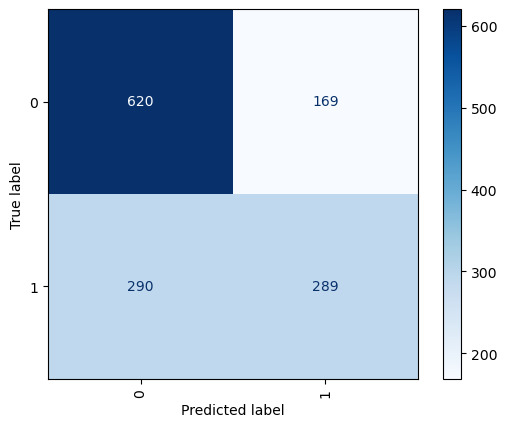

In [21]:
#salvo le previsioni sul test set in una variabile e stampo il classification report e la confusion matrix
test_predictions = svc.predict(X_test)
print(classification_report(test_labels, test_predictions, zero_division=0))
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, xticks_rotation='vertical', cmap='Blues');

In [22]:
#confronto con una baseline per vedere se il modello è buono
from sklearn.dummy import DummyClassifier
baseline_classifier = DummyClassifier(strategy="most_frequent") #predice sempre la classe più frequente
baseline_classifier.fit(X_train, train_labels)
baseline_test_predictions = baseline_classifier.predict(X_test)
print(classification_report(test_labels, baseline_test_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73       789
           1       0.00      0.00      0.00       579

    accuracy                           0.58      1368
   macro avg       0.29      0.50      0.37      1368
weighted avg       0.33      0.58      0.42      1368



-------------------------------------------------------------------------------------

Valutazione del sistema con un processo di 5-fold cross validation condotto sul training set

In [23]:
#importo le librerie per fare k-fold cross validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [24]:
#fitto e trasformo le features con il MinMaxScaler
x_train_folds = scaler.fit_transform(features)
#trasformo le labels in un array numpy per utilizzarle poi
y_train_folds = np.asarray(labels)

In [25]:
splitter = KFold(n_splits=5, random_state=42, shuffle=True) #faccio 5-folds, utilizzo come prima random_state 42 per la riproducibilità, e shuffle mescola i dati prima di distribuirli nei folds
folds = list(splitter.split(x_train_folds))

#stampo le dimensioni dei folds per assicurarmi che tutto abbia funzionato correttamente
for i in range(len(folds)):
    print(len(folds[i][0]), len(folds[i][1]))

5469 1368
5469 1368
5470 1367
5470 1367
5470 1367


In [26]:
all_y_true = [] #etichette vere
all_y_pred = [] #etichette predette

for i in range(len(folds)): #itero sui folds generati prima
    #prendo i dati di training e di test per l'attuale fold
    train_ids = folds[i][0]
    test_ids = folds[i][1]
    
    #creo training set e test set per l'attuale fold
    fold_X_train = x_train_folds[train_ids]
    fold_y_train = y_train_folds[train_ids]
    fold_X_test = x_train_folds[test_ids]
    fold_y_test = y_train_folds[test_ids]
    
    #creo e addestro un svc sul training dell'attuale fold
    kfold_svc = LinearSVC(dual=False)
    kfold_svc.fit(fold_X_train, fold_y_train)
    #faccio una predizione sul test dell'attuale fold
    fold_y_pred = kfold_svc.predict(fold_X_test)
    
    #calcolo l'accuratezza dell'svc nel fold
    fold_accuracy = accuracy_score(fold_y_test, fold_y_pred)
    
    #calcolo l'accuratezza nel fold anche di un dummy classifier con strategia most_frequent (come prima), per avere una baseline con cui confrontare l'accuratezza dell'svc
    dummy_clf = DummyClassifier(strategy="most_frequent")   # dummy classifier viene utilizzato per avere una baseline
    dummy_clf.fit(fold_X_train, fold_y_train)
    dummy_score = dummy_clf.score(fold_X_test, fold_y_test)
    
    #aggiungo le etichette vere e le etichette predette alle liste create inizialmente, per poter calcolare poi le metriche
    all_y_true += fold_y_test.tolist()
    all_y_pred += fold_y_pred.tolist()
    
    #stampo l'accuracy e la confronto con la baseline (l'accuracy del dummy classifier)
    print(f"Accuracy fold {i+1}: {fold_accuracy}, baseline: {dummy_score}")

Accuracy fold 1: 0.6644736842105263, baseline: 0.5767543859649122
Accuracy fold 2: 0.6798245614035088, baseline: 0.6030701754385965
Accuracy fold 3: 0.6832479882955377, baseline: 0.6283833211411851
Accuracy fold 4: 0.6613021214337966, baseline: 0.5961960497439649
Accuracy fold 5: 0.6686174103877103, baseline: 0.5727871250914411


In [27]:
print(classification_report(all_y_true, all_y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      4071
           1       0.61      0.51      0.56      2766

    accuracy                           0.67      6837
   macro avg       0.66      0.65      0.65      6837
weighted avg       0.67      0.67      0.67      6837



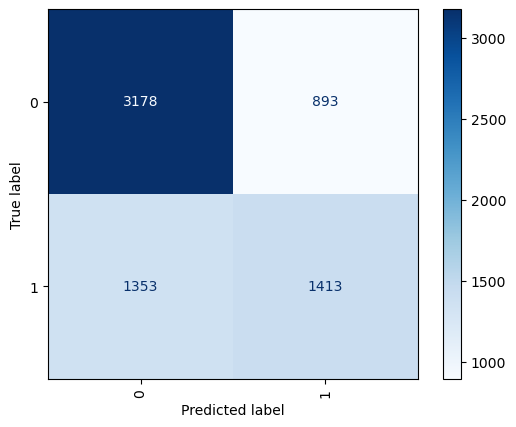

In [28]:
ConfusionMatrixDisplay.from_predictions(all_y_true, all_y_pred, xticks_rotation='vertical', cmap='Blues');

-------------------------------------------------------------------------------------

Valutazione del sistema sul test set ufficiale del task.

Per fare ciò, riapplico tutto il procedimento, a partire dalla preparazione dell'input per Profiling-UD, ai 2 test set ufficiali del task.

In [29]:
#creo i path per il file di training e per le cartelle che andrò a creare (per poi passarle a Profiling-UD)
test_path_1 = 'haspeede2_reference/haspeede2_reference_taskAB-news.tsv'
test_path_2 = 'haspeede2_reference/haspeede2_reference_taskAB-tweets.tsv'
out_dir_test_1 = 'profiling_input_test_1'
out_dir_test_2 = 'profiling_input_test_2'

In [30]:
#estraggo dai test_path il dataframe e lo salvo come df di pandas, usando tab come separatore in quanto è un .tsv
df_test_1 = pd.read_csv(test_path_1, sep='\t')
df_test_2 = pd.read_csv(test_path_2, sep='\t')
#stampo df_test_1 e df_test_2 per vedere se l'estrazione è avvenuta correttamente

In [31]:
df_test_1

,11976,"Andate pure là, tanto quei fessi degli italiani.... Capito perché ci invadono? Il clandestino confessa",1,0
0,12142,Che fine spero che faccia il killer nigeriano ...,1,1
1,12088,Così i profughi ci svuotano i negozi a Pordenone,1,1
2,12030,Così umiliano gli italiani e coccolano i cland...,1,1
3,11775,"Danno soldi ai clandestini, ma ai disabili inv...",1,1
4,11630,"Emergenza, Minniti annulla il viaggio e torna ...",1,1
...,...,...,...,...
494,10085,"Sea Watch, il pm fa sbarcare i migranti. Salvi...",0,0
495,10044,Il pm fa sbarcare i migranti Il capo leghista ...,0,0
496,10602,"Pisa, il poster di Salvini con i migranti fatt...",0,0
497,10193,Sea Watch e lo sbarco del migrante con una sol...,0,0


In [32]:
df_test_2

,11834,"@user A me pare una scelta politica suicida puntare tutto su una battaglia sicuramente perdente in favore dell'immigrazione incontrollata...Meglio così, spariranno più velocemente!",1,0
0,12113,@user e' un perfetto musulmano!!! chi dice il ...,1,1
1,11770,Mai Tg e i giornaloni hanno parlato di questa ...,1,1
2,11937,@user Ipocriti farabutti. Fanno morire i terre...,1,1
3,11870,@user @user @user L'IMMIGRAZIONE C'E' STATO UN...,1,1
4,12122,@user @user SI CERTO E TUTTIQUELLI CHE GIRANO ...,1,1
...,...,...,...,...
1257,10091,Il Razzismo gli viene inculcato sin da bambini...,1,1
1258,10046,PERCHÉ DI QUESTO ORRENDO STUPRO NON DI PARLA? ...,1,1
1259,10377,FERMIAMO L'IMPOSTORE. Forse saranno necesarie ...,1,1
1260,10199,@user @user @user @user @user @user @user @use...,1,1


Questi dataset, a differenza di quello estratto originariamente, non presentano i nomi delle colonne ma, al loro posto, subito il primo documento. Vado a correggere questa cosa per entrambi.

In [33]:
#innanzitutto droppo la colonna "0" in entrambe, che corrisponde a stereotype e non ci interessa per la nostra analisi
df_test_1 = df_test_1.drop(columns=['0'])
df_test_2 = df_test_2.drop(columns=['0'])

In [34]:
#aggiungo, per entrambe, una nuova riga, con valori corrispondenti a quelli dei nomi di colonna

#salvo i nomi delle colonne in 3 variabili
colonna1 = df_test_1.columns[0]
colonna2 = df_test_1.columns[1]
colonna3 = df_test_1.columns[2]
#aggiungo in fondo la nuova riga con i valori che erano nomi di colonna
df_test_1.loc[len(df_test_1.index)] = [colonna1, colonna2, colonna3]
#rinomino le colonne in "id", "text" e "hs"
df_test_1.columns = ['id', 'text', 'hs']
#stampo il tutto per vedere che sia andato tutto a buon fine
df_test_1

,id,text,hs
0,12142,Che fine spero che faccia il killer nigeriano ...,1
1,12088,Così i profughi ci svuotano i negozi a Pordenone,1
2,12030,Così umiliano gli italiani e coccolano i cland...,1
3,11775,"Danno soldi ai clandestini, ma ai disabili inv...",1
4,11630,"Emergenza, Minniti annulla il viaggio e torna ...",1
...,...,...,...
495,10044,Il pm fa sbarcare i migranti Il capo leghista ...,0
496,10602,"Pisa, il poster di Salvini con i migranti fatt...",0
497,10193,Sea Watch e lo sbarco del migrante con una sol...,0
498,10282,"Decreto Sicurezza Bis, multe più salate per ch...",0


In [35]:
#ripeto il procedimento per df_test_2

#salvo i nomi delle colonne in 3 variabili
colonna1 = df_test_2.columns[0]
colonna2 = df_test_2.columns[1]
colonna3 = df_test_2.columns[2]
#aggiungo in fondo la nuova riga con i valori che erano nomi di colonna
df_test_2.loc[len(df_test_2.index)] = [colonna1, colonna2, colonna3]
#rinomino le colonne in "id", "text" e "hs"
df_test_2.columns = ['id', 'text', 'hs']
#stampo il tutto per vedere che sia andato tutto a buon fine
df_test_2

,id,text,hs
0,12113,@user e' un perfetto musulmano!!! chi dice il ...,1
1,11770,Mai Tg e i giornaloni hanno parlato di questa ...,1
2,11937,@user Ipocriti farabutti. Fanno morire i terre...,1
3,11870,@user @user @user L'IMMIGRAZIONE C'E' STATO UN...,1
4,12122,@user @user SI CERTO E TUTTIQUELLI CHE GIRANO ...,1
...,...,...,...
1258,10046,PERCHÉ DI QUESTO ORRENDO STUPRO NON DI PARLA? ...,1
1259,10377,FERMIAMO L'IMPOSTORE. Forse saranno necesarie ...,1
1260,10199,@user @user @user @user @user @user @user @use...,1
1261,10574,"Ci vuole ""coraggio"" ad abbinare la parola Egua...",1


In [36]:
#posso riusare get_filename e get, riempio le due cartelle da passare a Profiling-UD

#ciclo per tutte le righe di df_train, creando per ognuna un file .txt con nome e contenuto costruiti dalle due funzioni precedenti
for i in range(df_test_1.shape[0]): #.shape restituisce una tupla con il numero di righe e colonne del df; utilizzo .shape[0] per ciclare sulle righe
    out_file_name = get_filename(df_test_1, i) #creo una variabile out_file_name che contiene il nome del file grazie alla funzione get_filename
    out_file_path = os.path.join(out_dir_test_1, out_file_name) #creo una variabile out_file_path che contiene il path finale, unendo la mia directory di output e il nome del file contenuto nella variabile out_file_name
    with open(out_file_path, 'w') as file: #creo il nuovo file .txt
        file.write(get_text(df_test_1, i)) #scrivo sul nuovo file .txt ciò che ottengo dalla funzione get_text
        
#ciclo per tutte le righe di df_train, creando per ognuna un file .txt con nome e contenuto costruiti dalle due funzioni precedenti
for i in range(df_test_2.shape[0]): #.shape restituisce una tupla con il numero di righe e colonne del df; utilizzo .shape[0] per ciclare sulle righe
    out_file_name = get_filename(df_test_2, i) #creo una variabile out_file_name che contiene il nome del file grazie alla funzione get_filename
    out_file_path = os.path.join(out_dir_test_2, out_file_name) #creo una variabile out_file_path che contiene il path finale, unendo la mia directory di output e il nome del file contenuto nella variabile out_file_name
    with open(out_file_path, 'w') as file: #creo il nuovo file .txt
        file.write(get_text(df_test_2, i)) #scrivo sul nuovo file .txt ciò che ottengo dalla funzione get_text

In [37]:
#specifico i path dei file .csv ottenuti come output da Profiling-Ud
profiling_output_path_test_1 = 'profiling_output_test_1/11936.csv'
profiling_output_path_test_2 = 'profiling_output_test_2/11937.csv'

In [38]:
#i due dataset di test hanno rispettivamente 124 e 133 features, al contrario delle 136 su cui è stato addestrato l'svc. devo portare anch'essi a 136, e lo faccio aggiungendo le colonne in base al dataset di training ripreso da prima e riempendole con 0
df_training = pd.read_csv(profiling_output_path, sep = "\t")
df_test_1 = pd.read_csv(profiling_output_path_test_1, sep = "\t")
df_test_2 = pd.read_csv(profiling_output_path_test_2, sep = "\t")

#trovo le colonne mancanti di df_test_1 rispetto a df_training
columns_df_test_1 = set(df_test_1.columns)
columns_df_training = set(df_training.columns)
missing_in_df_test_1 = columns_df_training - columns_df_test_1
missing_in_df_training = columns_df_test_1 - columns_df_training
#stampo le colonne mancanti
print("Ci sono in training ma non in test_1:")
print(missing_in_df_test_1)
print("Ci sono in test_1 ma non in training:")
print(missing_in_df_training)
#dal momento che delle colonne mancano solo in test_1, semplicemente le aggiungo e riempio i valori con 0
for colonna in missing_in_df_test_1:
    df_test_1[colonna] = 0.0

#trovo le colonne mancanti di df_test_2 rispetto a df_training
columns_df_test_2 = set(df_test_2.columns)
missing_in_df_test_2 = columns_df_training - columns_df_test_2
missing_in_training = columns_df_test_2 - columns_df_training
#stampo le colonne mancanti
print("Ci sono in training ma non in test_2:")
print(missing_in_df_test_2)
print("Ci sono in test_2 ma non in training:")
print(missing_in_training)
#una colonna c'è in test_2 ma non in training, mentre 4 sono in training ma non in test_2, quindi droppo quella presente solo in test_2, e aggiungo le colonne presenti nel training riempendo i loro valori con 0
df_test_2 = df_test_2.drop(columns=['upos_dist_PART'])
for colonna in missing_in_df_test_2:
    df_test_2[colonna] = 0.0

Ci sono in training ma non in test_1:
{'dep_dist_dislocated', 'prep_dist_4', 'prep_dist_5', 'dep_dist_vocative', 'subordinate_dist_5', 'ttr_lemma_chunks_100', 'aux_form_dist_Ger', 'subordinate_dist_4', 'aux_mood_dist_Imp', 'subordinate_dist_3', 'dep_dist_flat:foreign', 'ttr_form_chunks_100'}
Ci sono in test_1 ma non in training:
set()
Ci sono in training ma non in test_2:
{'dep_dist_dislocated', 'ttr_form_chunks_100', 'ttr_lemma_chunks_100', 'prep_dist_5'}
Ci sono in test_2 ma non in training:
{'upos_dist_PART'}


In [39]:
#stampo df_test_1 e df_test_2 per vedere se hanno 136 features (e quindi 137 colonne) come df_training
df_test_1

,Filename,n_sentences,n_tokens,tokens_per_sent,char_per_tok,upos_dist_ADJ,upos_dist_ADP,upos_dist_ADV,upos_dist_AUX,upos_dist_CCONJ,...,prep_dist_5,dep_dist_vocative,subordinate_dist_5,ttr_lemma_chunks_100,aux_form_dist_Ger,subordinate_dist_4,aux_mood_dist_Imp,subordinate_dist_3,dep_dist_flat:foreign,ttr_form_chunks_100
0,10556#0.conllu,1,20,20.000000,4.294118,5.000000,20.000000,0.000000,0.0,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11443#1.conllu,1,9,9.000000,5.875000,0.000000,22.222222,11.111111,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10762#1.conllu,3,20,6.666667,4.800000,5.000000,5.000000,5.000000,5.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10310#1.conllu,2,10,5.000000,7.750000,20.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10900#1.conllu,2,17,8.500000,4.571429,0.000000,11.764706,5.882353,0.0,5.882353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10134#1.conllu,2,14,7.000000,5.300000,7.142857,7.142857,7.142857,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,10798#1.conllu,1,12,12.000000,4.454545,0.000000,16.666667,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,10435#0.conllu,2,15,7.500000,4.083333,0.000000,6.666667,6.666667,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,11756#0.conllu,1,17,17.000000,4.400000,0.000000,23.529412,0.000000,0.0,5.882353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_test_2

,Filename,n_sentences,n_tokens,tokens_per_sent,char_per_tok,upos_dist_ADJ,upos_dist_ADP,upos_dist_ADV,upos_dist_AUX,upos_dist_CCONJ,...,avg_subordinate_chain_len,subordinate_dist_1,subordinate_dist_2,subordinate_dist_3,subordinate_dist_4,subordinate_dist_5,dep_dist_dislocated,ttr_form_chunks_100,ttr_lemma_chunks_100,prep_dist_5
0,10064#0.conllu,3,50,16.666667,5.295455,4.000000,10.000000,0.000000,4.000000,2.000000,...,4.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
1,11612#1.conllu,1,46,46.000000,4.954545,4.347826,15.217391,2.173913,6.521739,4.347826,...,2.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12206#1.conllu,3,46,15.333333,4.100000,2.173913,10.869565,6.521739,4.347826,4.347826,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10619#0.conllu,2,14,7.000000,4.538462,0.000000,21.428571,0.000000,7.142857,0.000000,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10423#1.conllu,2,44,22.000000,5.428571,9.090909,15.909091,0.000000,0.000000,2.272727,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,10187#0.conllu,1,22,22.000000,5.166667,9.090909,4.545455,4.545455,0.000000,4.545455,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1259,11004#1.conllu,5,61,12.200000,4.509804,3.278689,11.475410,3.278689,3.278689,1.639344,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1260,10055#0.conllu,2,41,20.500000,5.621622,12.195122,12.195122,4.878049,0.000000,7.317073,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,11820#1.conllu,1,20,20.000000,5.944444,0.000000,5.000000,0.000000,5.000000,0.000000,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#salvo i due nuovi dataset ottenuti come .csv
file_path_test_1 = 'profiling_output_test_1/11936revised.csv'
file_path_test_2 = 'profiling_output_test_2/11937revised.csv'
df_test_1.to_csv(file_path_test_1, index=False, sep='\t') #importante index false e sep \t altrimenti non risulta nello stesso formato degli altri dataset e non funziona su load_dataset
df_test_2.to_csv(file_path_test_2, index=False, sep='\t')

In [42]:
#aggiorno i path coi nuovi file
profiling_output_path_test_1 = 'profiling_output_test_1/11936revised.csv'
profiling_output_path_test_2 = 'profiling_output_test_2/11937revised.csv'

In [43]:
#riutilizzo la funzione load_dataset per i due nuovi file ottenuti
features_names_test_1, documents_info_test_1, features_test_1 = load_dataset(profiling_output_path_test_1)
features_names_test_2, documents_info_test_2, features_test_2 = load_dataset(profiling_output_path_test_2)

In [44]:
#creo le liste di labels, riutilizzando la funzione create_test_label
labels_test_1 = create_label_list(documents_info_test_1)
labels_test_2 = create_label_list(documents_info_test_2)

In [45]:
#normalizzo adesso tutti i valori delle features tra 0 e 1, utilizzando il MinMaxScaler
#lo scaler è già stato fittato su tutte le features di train, quindi trasformo i dati di test
Y_test_1 = scaler.transform(features_test_1)
Y_test_2 = scaler.transform(features_test_2)

In [46]:
#prevedo le etichette per i test set
#l'svc è già fittato sui dati di train però all'interno dell'ultimo fold, lo fitto di nuovo sugli interi dati di train
svc.fit(features, labels)
#faccio le predizioni sui dati di test con l'svc fittato sui dati di train
y_pred_test_1 = svc.predict(Y_test_1)
y_pred_test_2 = svc.predict(Y_test_2)

In [47]:
#calcolo le metriche di valutazione per il test set 1
print("Valutazione sul Test Set 1:")
print(classification_report(labels_test_1, y_pred_test_1))

#calcolo le metriche di valutazione per il test set 2
print("Valutazione sul Test Set 2:")
print(classification_report(labels_test_2, y_pred_test_2))

Valutazione sul Test Set 1:
              precision    recall  f1-score   support

           0       0.64      0.98      0.77       319
           1       0.40      0.02      0.04       181

    accuracy                           0.63       500
   macro avg       0.52      0.50      0.41       500
weighted avg       0.55      0.63      0.51       500

Valutazione sul Test Set 2:
              precision    recall  f1-score   support

           0       0.50      0.91      0.65       641
           1       0.43      0.07      0.12       622

    accuracy                           0.50      1263
   macro avg       0.47      0.49      0.38      1263
weighted avg       0.47      0.50      0.39      1263



-------------------------------------------------------------------------------------

Elenco delle 15 features più importanti per la classificazione.

In [48]:
#controllo le etichette di classe del classificatore svc addestrato, essendo binario dovranno essere 0 e 1
svc.classes_

array(['0', '1'], dtype='<U1')

In [49]:
coefs = svc.coef_ #array di forma (1, n_features) dal momento che il numero di classi è 2
coefs.shape

(1, 136)

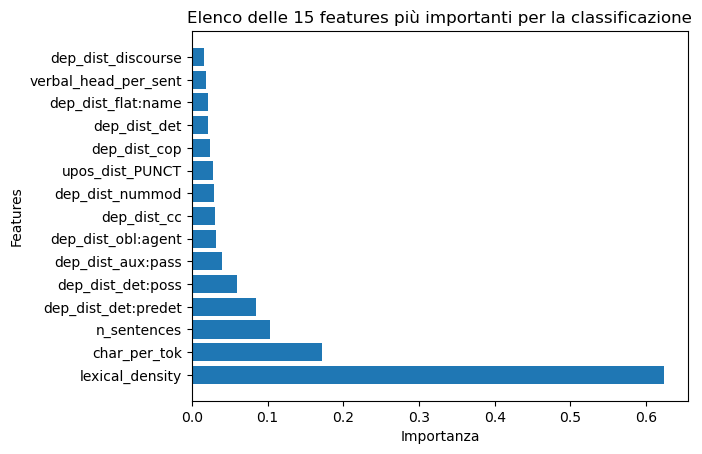

In [50]:
#importo matplotlib per lavorare sui grafici
import matplotlib.pyplot as plt
#metto idx a 0 perché in un classificatore binario un singolo vettore di coefficienti è sufficiente per rappresentare la decisione tra le due classi.
idx = 0
class_coefs = coefs[idx]

#creo il dizionario di importanza delle feature
feature_importances = {feature_name: coef for feature_name, coef in zip(features_names, class_coefs)}
#ordino il dizionario in base all'importanza delle features
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

#stampo un bar chart che mostra le 15 features più importanti per la classificazione
num_to_plot = 15
plt.title('Elenco delle 15 features più importanti per la classificazione')
plt.barh(range(num_to_plot), list(sorted_feature_importances.values())[:num_to_plot], align='center')
plt.yticks(range(num_to_plot), list(sorted_feature_importances.keys())[:num_to_plot])
plt.xlabel('Importanza')
plt.ylabel('Features')
plt.show()